# Importing all Libraries


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import optuna
from optuna.visualization.matplotlib import plot_param_importances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Gathering Data

In [6]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
X_train = df_train.drop(columns='phishing', axis=1)
X_test = df_test.drop(columns='phishing', axis=1)
y_train = df_train[['phishing']]
y_test = df_test[['phishing']]

# Logistic Regression Algorithm


In [43]:
# step 1 : Define an objective function to be maximized:
def objective(trial):
    classifier_name = 'LogReg'
     
    # step 2 : Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        penalty = trial.suggest_categorical('penalty', ['l2'])
        
        # if penalty == 'l1':
        #     solver = 'saga'
        # else:
        solver = trial.suggest_categorical('solver', ['lbfgs'])
        
        C = trial.suggest_uniform('C', 0.01, 10)
        classifier_obj = LogisticRegression(penalty=penalty, C=C, solver=solver)
        # classifier_obj = LogisticRegression(penalty=penalty, C=C)
    
    # step 3 : Scoring method :
    score = cross_val_score(estimator=classifier_obj, X=X_train, y=y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# step 4 : Running it :
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-01-18 18:06:04,464] A new study created in memory with name: no-name-d35cb2a5-c229-433a-a809-f57b2e506d4d
[I 2024-01-18 18:06:04,766] Trial 0 finished with value: 0.9249782053611574 and parameters: {'penalty': 'l2', 'solver': 'lbfgs', 'C': 6.852849863251801}. Best is trial 0 with value: 0.9249782053611574.
[I 2024-01-18 18:06:05,045] Trial 1 finished with value: 0.9249653263976564 and parameters: {'penalty': 'l2', 'solver': 'lbfgs', 'C': 3.933689964536487}. Best is trial 0 with value: 0.9249782053611574.
[I 2024-01-18 18:06:05,339] Trial 2 finished with value: 0.9249782053611574 and parameters: {'penalty': 'l2', 'solver': 'lbfgs', 'C': 0.5696446008521246}. Best is trial 0 with value: 0.9249782053611574.
[I 2024-01-18 18:06:05,685] Trial 3 finished with value: 0.9249782053611574 and parameters: {'penalty': 'l2', 'solver': 'lbfgs', 'C': 7.556052520778856}. Best is trial 0 with value: 0.9249782053611574.
[I 2024-01-18 18:06:06,069] Trial 4 finished with value: 0.9249782053611574 a

# Important hyperparameters


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

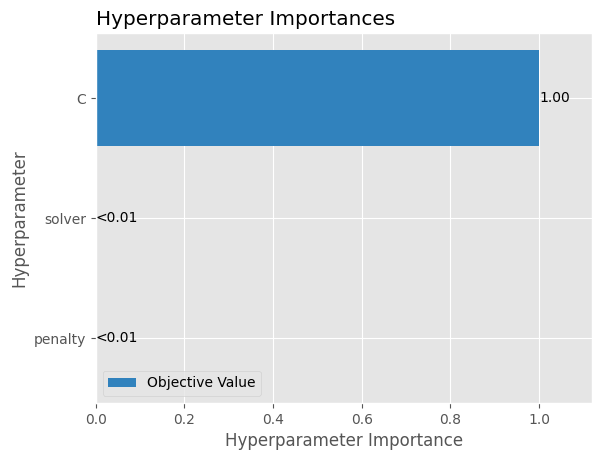

In [44]:
plot_param_importances(study)

# Getting best parameter


In [45]:
trial = study.best_trial
trial.params

{'penalty': 'l2', 'solver': 'lbfgs', 'C': 6.852849863251801}

# Training model with best parameters


In [46]:
logReg = LogisticRegression(penalty=trial.params['penalty'], C=trial.params['C'])
logReg.fit(X_train, y_train)

LogisticRegression(C=6.852849863251801)

# Performance matrix


In [54]:
y_pred = logReg.predict(X_test)
print("Confusion matrix is as follows : \n\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy score is :",accuracy_score(y_test, y_pred))
print("\nClassification report is as follows :\n\n", classification_report(y_test, y_pred))

Confusion matrix is as follows : 

 [[17333  1845]
 [ 1022 18156]]

Accuracy score is : 0.925252893940974

Classification report is as follows :

               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     19178
         1.0       0.91      0.95      0.93     19178

    accuracy                           0.93     38356
   macro avg       0.93      0.93      0.93     38356
weighted avg       0.93      0.93      0.93     38356



# Random forest Algorithm

In [60]:
# step 1 : Define an objective function to be maximized :
def objective(trial):
    classifier_name = 'RandomForest'
    
    # step 2 : Setup values for the hyperparameters :
    if classifier_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000, 10)
        max_depth = trial.suggest_int('max_depth', 10, 100, log=True)
        criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
        
        classifier_obj = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        
    # step 3 : Scoring method :
    score = cross_val_score(estimator=classifier_obj, X=X_train, y=y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# step 4 : Running it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-01-18 20:09:57,925] A new study created in memory with name: no-name-5529f8af-3510-4d46-958d-9dff9b8dd08e
[I 2024-01-18 20:11:22,552] Trial 0 finished with value: 0.9580264935581102 and parameters: {'n_estimators': 530, 'max_depth': 97, 'criterion': 'gini', 'min_samples_split': 15, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.9580264935581102.
[I 2024-01-18 20:12:37,121] Trial 1 finished with value: 0.9579363363350021 and parameters: {'n_estimators': 480, 'max_depth': 25, 'criterion': 'gini', 'min_samples_split': 2, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.9580264935581102.
[I 2024-01-18 20:16:01,567] Trial 2 finished with value: 0.9587219764968138 and parameters: {'n_estimators': 1240, 'max_depth': 35, 'criterion': 'entropy', 'min_samples_split': 18, 'min_samples_leaf': 15}. Best is trial 2 with value: 0.9587219764968138.
[I 2024-01-18 20:17:17,468] Trial 3 finished with value: 0.9602674849600096 and parameters: {'n_estimators': 460, 'max_depth': 13, 'c

# Important hyperparameters


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

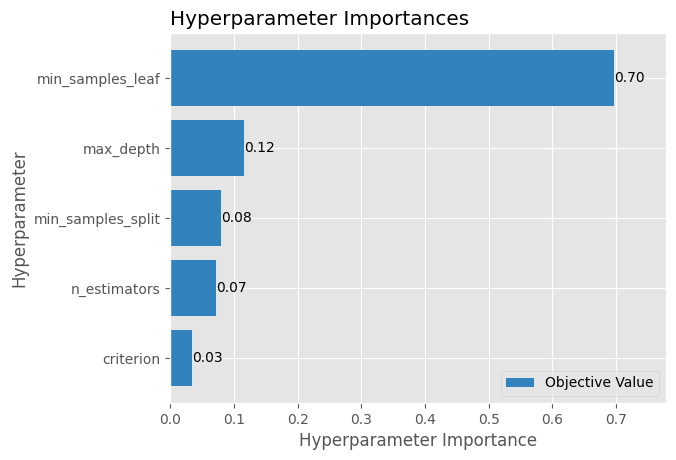

In [62]:
plot_param_importances(study)

# Getting best parameter


In [65]:
trial = study.best_trial
trial.params

{'n_estimators': 1420,
 'max_depth': 60,
 'criterion': 'entropy',
 'min_samples_split': 18,
 'min_samples_leaf': 5}

# Training model with best parameters


In [67]:
randomForest = RandomForestClassifier(n_estimators=trial.params['n_estimators'], criterion=trial.params['criterion'], max_depth=trial.params['max_depth'], min_samples_split=trial.params['min_samples_split'], min_samples_leaf=trial.params['min_samples_leaf'])
randomForest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=60, min_samples_leaf=5,
                       min_samples_split=18, n_estimators=1420)

# Performance matrix


In [68]:
y_pred = randomForest.predict(X_test)
print("Confusion matrix is as follows : \n\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy score is :",accuracy_score(y_test, y_pred))
print("\nClassification report is as follows :\n\n", classification_report(y_test, y_pred))

Confusion matrix is as follows : 

 [[17991  1187]
 [  537 18641]]

Accuracy score is : 0.9550526645114193

Classification report is as follows :

               precision    recall  f1-score   support

         0.0       0.97      0.94      0.95     19178
         1.0       0.94      0.97      0.96     19178

    accuracy                           0.96     38356
   macro avg       0.96      0.96      0.96     38356
weighted avg       0.96      0.96      0.96     38356



# SVC Algorithm

In [73]:
# step 1 : define an objective function to be maximized
def objective(trial):
    classifier_name = 'svc'
    
    # step 2 : setup values for the hyperparameters
    if classifier_name == 'svc':
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        C = trial.suggest_uniform('C', 0.01, 10)
        degree = int(trial.suggest_discrete_uniform('degree', 1, 5, 1))
        
        classifier_obj = SVC(kernel=kernel, C=C, degree=degree)
        
    # step 3 : Scoring method 
    score = cross_val_score(estimator=classifier_obj, X=X_train, y=y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# step 4 : Running it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-01-18 23:05:10,615] A new study created in memory with name: no-name-64ca40f3-f7cf-485f-ad38-fa77eaa88efe
[I 2024-01-18 23:06:17,884] Trial 0 finished with value: 0.8783294102431056 and parameters: {'kernel': 'sigmoid', 'C': 9.682121918820735, 'degree': 2.0}. Best is trial 0 with value: 0.8783294102431056.
[I 2024-01-18 23:07:30,491] Trial 1 finished with value: 0.941025821341006 and parameters: {'kernel': 'poly', 'C': 8.330633590212898, 'degree': 3.0}. Best is trial 1 with value: 0.941025821341006.
[I 2024-01-18 23:10:27,890] Trial 2 finished with value: 0.9267426671515618 and parameters: {'kernel': 'linear', 'C': 9.521134528044882, 'degree': 5.0}. Best is trial 1 with value: 0.941025821341006.
[I 2024-01-18 23:11:46,330] Trial 3 finished with value: 0.9499511958393542 and parameters: {'kernel': 'rbf', 'C': 7.7922412862319135, 'degree': 2.0}. Best is trial 3 with value: 0.9499511958393542.
[I 2024-01-18 23:12:52,476] Trial 4 finished with value: 0.8822575179967878 and paramete

# Important hyperparameters

<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

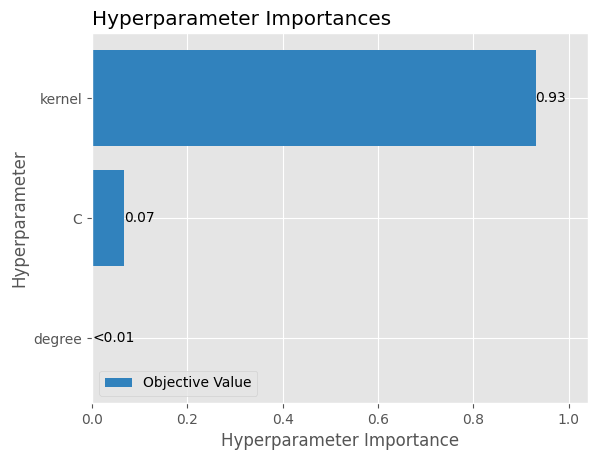

In [76]:
plot_param_importances(study)

# Getting best parameter

In [77]:
trial = study.best_trial
trial.params

{'kernel': 'rbf', 'C': 7.7922412862319135, 'degree': 2.0}

# Training model with best parameters


In [80]:
svc = SVC(kernel=trial.params['kernel'], C=trial.params['C'], degree=int(trial.params['degree']))
svc.fit(X_train, y_train)

SVC(C=7.7922412862319135, degree=2)

# Performance matrix


In [82]:
y_pred = svc.predict(X_test)
print("Confusion matrix is as follows : \n\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy score is :",accuracy_score(y_test, y_pred))
print("\nClassification report is as follows :\n\n", classification_report(y_test, y_pred))

Confusion matrix is as follows : 

 [[18081  1097]
 [  812 18366]]

Accuracy score is : 0.9502294295546981

Classification report is as follows :

               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     19178
         1.0       0.94      0.96      0.95     19178

    accuracy                           0.95     38356
   macro avg       0.95      0.95      0.95     38356
weighted avg       0.95      0.95      0.95     38356



# Naive Bayes


In [85]:
# step 1 : define an objective function to be maximized
def objective(trial):
    classifier_name = 'naiveBayes'
    
    # step 2 : Setup values for the hyperparameters :
    if classifier_name == 'naiveBayes':
        var_smoothing = trial.suggest_float('var_smoothing', 1e-4, 0.3, log=True)
        
        classifier_obj = GaussianNB(var_smoothing=var_smoothing)
        
    # step 3 : Scoring method :
    score = cross_val_score(estimator=classifier_obj, X=X_train, y=y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# step 4 : Running it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-01-18 23:33:36,783] A new study created in memory with name: no-name-62ec3b43-124a-4fbe-b33f-04305b086daa
[I 2024-01-18 23:33:36,943] Trial 0 finished with value: 0.9178688313978447 and parameters: {'var_smoothing': 0.00639120698829929}. Best is trial 0 with value: 0.9178688313978447.
[I 2024-01-18 23:33:37,055] Trial 1 finished with value: 0.9178044330969833 and parameters: {'var_smoothing': 0.0014781102699746571}. Best is trial 0 with value: 0.9178688313978447.
[I 2024-01-18 23:33:37,179] Trial 2 finished with value: 0.918422642752303 and parameters: {'var_smoothing': 0.03897178042823965}. Best is trial 2 with value: 0.918422642752303.
[I 2024-01-18 23:33:37,301] Trial 3 finished with value: 0.9177915536358601 and parameters: {'var_smoothing': 0.00017203717979741607}. Best is trial 2 with value: 0.918422642752303.
[I 2024-01-18 23:33:37,448] Trial 4 finished with value: 0.9182680807592433 and parameters: {'var_smoothing': 0.07228856677939174}. Best is trial 2 with value: 0.91

# Important hyperparameters

<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

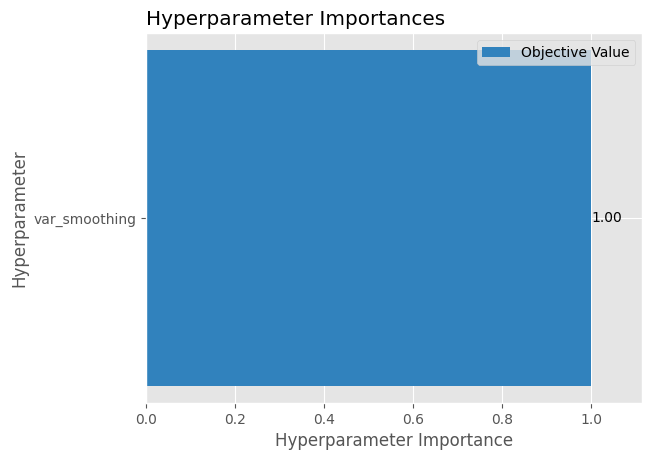

In [87]:
plot_param_importances(study)

# Getting best parameter


In [89]:
trial = study.best_trial
trial.params

{'var_smoothing': 0.03897178042823965}

# Training model with best parameters

In [91]:
naiveBayes = GaussianNB(var_smoothing=trial.params['var_smoothing'])
naiveBayes.fit(X_train, y_train)

GaussianNB(var_smoothing=0.03897178042823965)

# Performance matrix

In [93]:
y_pred = naiveBayes.predict(X_test)
print("Confusion matrix is as follows : \n\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy score is :",accuracy_score(y_test, y_pred))
print("\nClassification report is as follows :\n\n", classification_report(y_test, y_pred))

Confusion matrix is as follows : 

 [[16441  2737]
 [  373 18805]]

Accuracy score is : 0.9189175096464699

Classification report is as follows :

               precision    recall  f1-score   support

         0.0       0.98      0.86      0.91     19178
         1.0       0.87      0.98      0.92     19178

    accuracy                           0.92     38356
   macro avg       0.93      0.92      0.92     38356
weighted avg       0.93      0.92      0.92     38356



# Decision Tree

In [96]:
X_train.shape

(77644, 11)

In [99]:
# step 1 : Define an objective function to be maximized
def objective(trial):
    classifier_name = 'decisionTree'
    
    # step 2 : Setup values for hyperparameters
    if classifier_name == 'decisionTree':
        criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
        max_depth = trial.suggest_int('max_depth', 5, X_train.shape[1])
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
        
        classifier_obj = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        
    # step 3 : Scoring method :
    score = cross_val_score(estimator=classifier_obj, X=X_train, y=y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# step 4 : Running it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-01-19 00:44:35,232] A new study created in memory with name: no-name-6a3359a9-316b-47c0-8ea2-eae40fef8960
[I 2024-01-19 00:44:36,018] Trial 0 finished with value: 0.9521921767911846 and parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9521921767911846.
[I 2024-01-19 00:44:36,557] Trial 1 finished with value: 0.9417470617090892 and parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 18, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.9521921767911846.
[I 2024-01-19 00:44:37,287] Trial 2 finished with value: 0.9526300799622454 and parameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 16}. Best is trial 2 with value: 0.9526300799622454.
[I 2024-01-19 00:44:37,868] Trial 3 finished with value: 0.9481480364485226 and parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 7}. Best is trial 2

# Important hyperparameters


<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

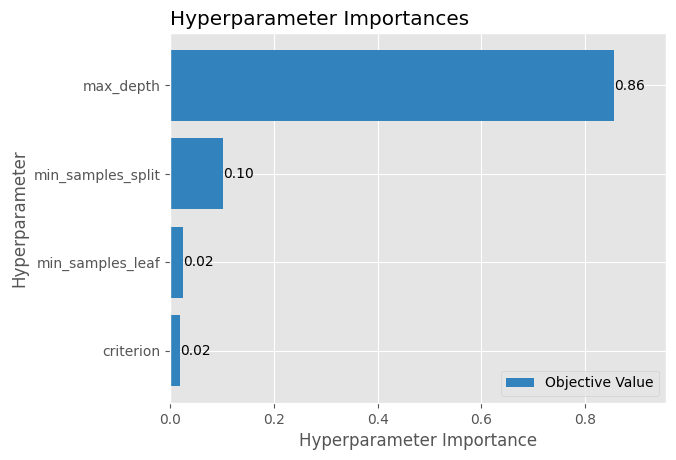

In [101]:
plot_param_importances(study)

# Getting best parameter


In [103]:
trial = study.best_trial
trial.params

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_split': 10,
 'min_samples_leaf': 13}

# Training model with best parameters


In [105]:
decisionTree = DecisionTreeClassifier(criterion=trial.params['criterion'], max_depth=trial.params['max_depth'], min_samples_split=trial.params['min_samples_split'], min_samples_leaf=trial.params['min_samples_leaf'])
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=13,
                       min_samples_split=10)

# Performance matrix

In [106]:
y_pred = decisionTree.predict(X_test)
print("Confusion matrix is as follows : \n\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy score is :",accuracy_score(y_test, y_pred))
print("\nClassification report is as follows :\n\n", classification_report(y_test, y_pred))

Confusion matrix is as follows : 

 [[17788  1390]
 [  722 18456]]

Accuracy score is : 0.944936906872458

Classification report is as follows :

               precision    recall  f1-score   support

         0.0       0.96      0.93      0.94     19178
         1.0       0.93      0.96      0.95     19178

    accuracy                           0.94     38356
   macro avg       0.95      0.94      0.94     38356
weighted avg       0.95      0.94      0.94     38356



# XGBoost

In [111]:
# step 1 : Define an objective function to be maximized
def objective(trial):
    classifier_name = 'xgboost'
    
    # step 2 : Setup values for the hyperparameters :
    if classifier_name == 'xgboost':
        verbosity = trial.suggest_int('verbosity', 0, 3)
        booster = trial.suggest_categorical('booster', ['dart', 'gbtree', 'gblinear'])
        reg_lambda = trial.suggest_float('reg_lambda', 1e-4, 1)
        reg_alpha = trial.suggest_float('reg_alpha', 1e-4, 1)
        subsample = trial.suggest_float('subsample', 0.1, 0.5)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.1, 0.5)
        gamma = trial.suggest_float('gamma', 1e-3, 4)
        eta = trial.suggest_float('eta', 0.001, 5)
        
        classifier_obj = XGBClassifier(verbosity = verbosity, booster = booster, reg_lambda = reg_lambda, reg_alpha = reg_alpha, subsample = subsample, colsample_bytree = colsample_bytree, gamma = gamma, eta = eta)
        
    # step 3 : Scoring method
    score = cross_val_score(estimator=classifier_obj, X=X_train, y=y_train, cv=3)
    accuracy = score.mean()
    return accuracy

# step 4 : Running it
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-01-19 01:50:14,099] A new study created in memory with name: no-name-2ee806ff-a5ca-43bf-b0c5-984c5fafabad
[I 2024-01-19 01:50:45,702] Trial 0 finished with value: 0.9248497212662574 and parameters: {'verbosity': 1, 'booster': 'dart', 'reg_lambda': 0.36018033504261915, 'reg_alpha': 0.40665432319553385, 'subsample': 0.26714967777481324, 'colsample_bytree': 0.4214340598146128, 'gamma': 3.5221818657030424, 'eta': 1.5739480006681255}. Best is trial 0 with value: 0.9248497212662574.
[I 2024-01-19 01:50:46,328] Trial 1 finished with value: 0.8488229624097595 and parameters: {'verbosity': 1, 'booster': 'gbtree', 'reg_lambda': 0.34927937854751334, 'reg_alpha': 0.040770564276234836, 'subsample': 0.4704776665284913, 'colsample_bytree': 0.2795220791176363, 'gamma': 3.283075176636029, 'eta': 4.353291552482734}. Best is trial 0 with value: 0.9248497212662574.
[I 2024-01-19 01:51:15,690] Trial 2 finished with value: 0.617576542870841 and parameters: {'verbosity': 0, 'booster': 'dart', 'reg_la

[01:51:15] ======== Monitor (0): HostSketchContainer ========
[01:51:15] AllReduce: 0.001568s, 1 calls @ 1568us

[01:51:15] MakeCuts: 0.001614s, 1 calls @ 1614us

[01:51:15] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[01:51:15] ======== Monitor (0): Learner ========
[01:51:15] Configure: 0.000375s, 1 calls @ 375us

[01:51:15] EvalOneIter: 0.000597s, 100 calls @ 597us

[01:51:15] GetGradient: 0.073415s, 100 calls @ 73415us

[01:51:15] PredictRaw: 0.000117s, 100 calls @ 117us

[01:51:15] UpdateOneIter: 0.170963s, 100 calls @ 170963us

[01:51:15] ======== Monitor (0): GBTree ========
[01:51:15] BoostNewTrees: 0.095958s, 100 calls @ 95958us

[01:51:15] CommitModel: 5.1e-05s, 100 calls @ 51us

[01:51:15] ======== Monitor (0): HistUpdater ========
[01:51:15] BuildHistogram: 0.003477s, 25 calls @ 3477us

[01:51:15] EvaluateSplits: 0.002096s, 125 calls @ 2096us

[01:51:15]

[I 2024-01-19 01:51:16,374] Trial 3 finished with value: 0.5004507811393171 and parameters: {'verbosity': 3, 'booster': 'gbtree', 'reg_lambda': 0.13651480749396616, 'reg_alpha': 0.06887307287150896, 'subsample': 0.3204877965455931, 'colsample_bytree': 0.36633801812491806, 'gamma': 1.8058131612150017, 'eta': 3.693883387148211}. Best is trial 0 with value: 0.9248497212662574.


[01:51:16] ======== Monitor (0): HostSketchContainer ========
[01:51:16] AllReduce: 0.001914s, 1 calls @ 1914us

[01:51:16] MakeCuts: 0.001967s, 1 calls @ 1967us

[01:51:16] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[01:51:16] ======== Monitor (0): Learner ========
[01:51:16] Configure: 0.000355s, 1 calls @ 355us

[01:51:16] EvalOneIter: 0.000422s, 100 calls @ 422us

[01:51:16] GetGradient: 0.053798s, 100 calls @ 53798us

[01:51:16] PredictRaw: 8.7e-05s, 100 calls @ 87us

[01:51:16] UpdateOneIter: 0.12845s, 100 calls @ 128450us

[01:51:16] ======== Monitor (0): GBTree ========
[01:51:16] BoostNewTrees: 0.073046s, 100 calls @ 73046us

[01:51:16] CommitModel: 4.2e-05s, 100 calls @ 42us

[01:51:16] ======== Monitor (0): HistUpdater ========
[01:51:16] BuildHistogram: 0.003115s, 24 calls @ 3115us

[01:51:16] EvaluateSplits: 0.001742s, 124 calls @ 1742us

[01:51:16] In

[I 2024-01-19 01:51:16,922] Trial 4 finished with value: 0.8074293223298606 and parameters: {'verbosity': 1, 'booster': 'gbtree', 'reg_lambda': 0.10090781136583205, 'reg_alpha': 0.07783684973413238, 'subsample': 0.3984753345502594, 'colsample_bytree': 0.4638624696384229, 'gamma': 2.7318035457711134, 'eta': 2.515504486246558}. Best is trial 0 with value: 0.9248497212662574.


[01:51:16] ======== Monitor (0): HostSketchContainer ========
[01:51:16] AllReduce: 0.001778s, 1 calls @ 1778us

[01:51:16] MakeCuts: 0.001824s, 1 calls @ 1824us

[01:51:16] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[01:51:17] ======== Monitor (0): Learner ========
[01:51:17] Configure: 0.00037s, 1 calls @ 370us

[01:51:17] EvalOneIter: 0.000375s, 100 calls @ 375us

[01:51:17] GetGradient: 0.044528s, 100 calls @ 44528us

[01:51:17] PredictRaw: 8.1e-05s, 100 calls @ 81us

[01:51:17] UpdateOneIter: 0.117387s, 100 calls @ 117387us

[01:51:17] ======== Monitor (0): GBTree ========
[01:51:17] BoostNewTrees: 0.071385s, 100 calls @ 71385us

[01:51:17] CommitModel: 3.6e-05s, 100 calls @ 36us

[01:51:17] ======== Monitor (0): HistUpdater ========
[01:51:17] BuildHistogram: 0.003685s, 36 calls @ 3685us

[01:51:17] EvaluateSplits: 0.001521s, 136 calls @ 1521us

[01:51:17] In

[I 2024-01-19 01:51:17,493] Trial 5 finished with value: 0.6271797645725472 and parameters: {'verbosity': 3, 'booster': 'gbtree', 'reg_lambda': 0.9925460215787051, 'reg_alpha': 0.9977713605767018, 'subsample': 0.36879636277718586, 'colsample_bytree': 0.32767259669315996, 'gamma': 3.8632760673737785, 'eta': 2.7588460094694005}. Best is trial 0 with value: 0.9248497212662574.


[01:51:17] ======== Monitor (0): Learner ========
[01:51:17] Configure: 0.000351s, 1 calls @ 351us

[01:51:17] EvalOneIter: 0.00042s, 100 calls @ 420us

[01:51:17] GetGradient: 0.051585s, 100 calls @ 51585us

[01:51:17] PredictRaw: 8.8e-05s, 100 calls @ 88us

[01:51:17] UpdateOneIter: 0.14044s, 100 calls @ 140440us

[01:51:17] ======== Monitor (0): GBTree ========
[01:51:17] BoostNewTrees: 0.087466s, 100 calls @ 87466us

[01:51:17] CommitModel: 4e-05s, 100 calls @ 40us

[01:51:17] ======== Monitor (0): HistUpdater ========
[01:51:17] BuildHistogram: 0.004599s, 53 calls @ 4599us

[01:51:17] EvaluateSplits: 0.00194s, 153 calls @ 1940us

[01:51:17] InitData: 0.018625s, 100 calls @ 18625us

[01:51:17] InitRoot: 0.013739s, 100 calls @ 13739us

[01:51:17] LeafPartition: 9e-06s, 100 calls @ 9us

[01:51:17] UpdatePosition: 0.018819s, 58 calls @ 18819us

[01:51:17] UpdatePredictionCache: 0.00194s, 100 calls @ 1940us

[01:51:17] UpdateTree: 0.057604s, 100 calls @ 57604us

[01:51:17] DEBUG: C:\bu

[I 2024-01-19 01:51:18,370] Trial 6 finished with value: 0.9564552425942047 and parameters: {'verbosity': 3, 'booster': 'gbtree', 'reg_lambda': 0.21936595929201058, 'reg_alpha': 0.3583061774828618, 'subsample': 0.13756399001679084, 'colsample_bytree': 0.34968859474224645, 'gamma': 3.8768036597987443, 'eta': 0.18390847730337265}. Best is trial 6 with value: 0.9564552425942047.


[01:51:18] ======== Monitor (0): Learner ========
[01:51:18] Configure: 0.00036s, 1 calls @ 360us

[01:51:18] EvalOneIter: 0.000422s, 100 calls @ 422us

[01:51:18] GetGradient: 0.007139s, 100 calls @ 7139us

[01:51:18] PredictRaw: 9.3e-05s, 100 calls @ 93us

[01:51:18] UpdateOneIter: 0.217545s, 100 calls @ 217545us

[01:51:18] ======== Monitor (0): GBTree ========
[01:51:18] BoostNewTrees: 0.208986s, 100 calls @ 208986us

[01:51:18] CommitModel: 4.1e-05s, 100 calls @ 41us

[01:51:18] ======== Monitor (0): HistUpdater ========
[01:51:18] BuildHistogram: 0.017066s, 328 calls @ 17066us

[01:51:18] EvaluateSplits: 0.005279s, 428 calls @ 5279us

[01:51:18] InitData: 0.036402s, 100 calls @ 36402us

[01:51:18] InitRoot: 0.013015s, 100 calls @ 13015us

[01:51:18] LeafPartition: 9e-06s, 100 calls @ 9us

[01:51:18] UpdatePosition: 0.111029s, 363 calls @ 111029us

[01:51:18] UpdatePredictionCache: 0.002699s, 100 calls @ 2699us

[01:51:18] UpdateTree: 0.183876s, 100 calls @ 183876us

[01:51:18] DE

[I 2024-01-19 01:51:46,584] Trial 7 finished with value: 0.5977513329727223 and parameters: {'verbosity': 3, 'booster': 'dart', 'reg_lambda': 0.49207056748038575, 'reg_alpha': 0.6133860722046047, 'subsample': 0.35243072091169647, 'colsample_bytree': 0.4731573260303005, 'gamma': 2.319018296992399, 'eta': 3.159136492874464}. Best is trial 6 with value: 0.9564552425942047.


[01:51:46] INFO: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:887: drop 0 trees, weight = 1
[01:51:46] ======== Monitor (0): Learner ========
[01:51:46] Configure: 0.000467s, 1 calls @ 467us

[01:51:46] EvalOneIter: 0.000495s, 100 calls @ 495us

[01:51:46] GetGradient: 0.056385s, 100 calls @ 56385us

[01:51:46] PredictRaw: 10.0743s, 100 calls @ 10074319us

[01:51:46] UpdateOneIter: 10.2261s, 100 calls @ 10226110us

[01:51:46] ======== Monitor (0): GBTree ========
[01:51:46] BoostNewTrees: 0.073982s, 100 calls @ 73982us

[01:51:46] ======== Monitor (0): HistUpdater ========
[01:51:46] BuildHistogram: 0.001964s, 25 calls @ 1964us

[01:51:46] EvaluateSplits: 0.00172s, 125 calls @ 1720us

[01:51:46] InitData: 0.016305s, 100 calls @ 16305us

[01:51:46] InitRoot: 0.016599s, 100 calls @ 16599us

[01:51:46] LeafPartition: 1.2e-05s, 100 calls @ 12us

[01:51:46] UpdatePosition: 0.007698s, 30 calls @ 7698us

[

[I 2024-01-19 01:51:47,285] Trial 8 finished with value: 0.4999871205388766 and parameters: {'verbosity': 1, 'booster': 'gblinear', 'reg_lambda': 0.7515013143836883, 'reg_alpha': 0.06271470555015225, 'subsample': 0.27065036433627265, 'colsample_bytree': 0.2840081485645738, 'gamma': 3.4498287951132482, 'eta': 1.7717682480339343}. Best is trial 6 with value: 0.9564552425942047.
[I 2024-01-19 01:51:48,395] Trial 9 finished with value: 0.954742284217246 and parameters: {'verbosity': 1, 'booster': 'gbtree', 'reg_lambda': 0.8775148760298435, 'reg_alpha': 0.6234191739102012, 'subsample': 0.14583857400250386, 'colsample_bytree': 0.45168503708563335, 'gamma': 2.218389617208991, 'eta': 0.7254876371572134}. Best is trial 6 with value: 0.9564552425942047.


# Important Hyperparameters

<Axes: title={'left': 'Hyperparameter Importances'}, xlabel='Hyperparameter Importance', ylabel='Hyperparameter'>

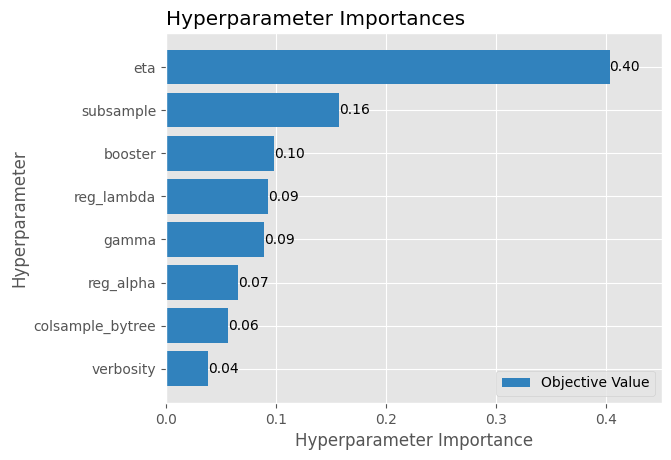

In [113]:
plot_param_importances(study)

# Getting best parameter


In [122]:
trial = study.best_trial
params = trial.params
params

{'verbosity': 3,
 'booster': 'gbtree',
 'reg_lambda': 0.21936595929201058,
 'reg_alpha': 0.3583061774828618,
 'subsample': 0.13756399001679084,
 'colsample_bytree': 0.34968859474224645,
 'gamma': 3.8768036597987443,
 'eta': 0.18390847730337265}

# Training model with best parameters


In [125]:
# xgboost = XGBClassifier(verbosity = trial.params['verbosity'], booster = trial.params['booster'], reg_lambda = trial.params['reg_lambda'], reg_alpha = trial.params['reg_alpha'], subsample = trial.params['subsample'], colsample_bytree = trial.params['colsample_bytree'], gamma=trial.params['gamma'], eta = trial.params['eta'])
# xgboost.fit(X_train, y_train)

xgboost = XGBClassifier(**params)
xgboost.fit(X_train, y_train)

[02:03:26] ======== Monitor (0): HostSketchContainer ========
[02:03:26] AllReduce: 0.00167s, 1 calls @ 1670us

[02:03:26] MakeCuts: 0.001716s, 1 calls @ 1716us

[02:03:26] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[02:03:26] ======== Monitor (0): Learner ========
[02:03:26] Configure: 0.000339s, 1 calls @ 339us

[02:03:26] EvalOneIter: 0.000476s, 100 calls @ 476us

[02:03:26] GetGradient: 0.009737s, 100 calls @ 9737us

[02:03:26] PredictRaw: 0.000109s, 100 calls @ 109us

[02:03:26] UpdateOneIter: 0.313419s, 100 calls @ 313419us

[02:03:26] ======== Monitor (0): GBTree ========
[02:03:26] BoostNewTrees: 0.302009s, 100 calls @ 302009us

[02:03:26] CommitModel: 4.1e-05s, 100 calls @ 41us

[02:03:26] ======== Monitor (0): HistUpdater ========
[02:03:26] BuildHistogram: 0.02184s, 366 calls @ 21840us

[02:03:26] EvaluateSplits: 0.006153s, 466 calls @ 6153us

[02:03:26]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.34968859474224645, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.18390847730337265, eval_metric=None, feature_types=None,
              gamma=3.8768036597987443, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# Performance matrix


In [127]:
y_pred = xgboost.predict(X_test)
print("Confusion matrix is as follows : \n\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy score is :",accuracy_score(y_test, y_pred))
print("\nClassification report is as follows :\n\n", classification_report(y_test, y_pred))

[02:04:47] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
Confusion matrix is as follows : 

 [[15427  3751]
 [  326 18852]]

Accuracy score is : 0.8937063301699865

Classification report is as follows :

               precision    recall  f1-score   support

         0.0       0.98      0.80      0.88     19178
         1.0       0.83      0.98      0.90     19178

    accuracy                           0.89     38356
   macro avg       0.91      0.89      0.89     38356
weighted avg       0.91      0.89      0.89     38356



# Insights

- From the above experiments we can select some hyperparameters for each algos
1. Logistic Regression: C
2. Random Forest: min_samples_split,min_samples_leaf
3. SVC: kernel
4. Naive Bayes: var_smoothing
5. Descision Tree: max_depth
6. XGBoost: subsample,alpha

# Creating a function to select the best model after hyperparameter tuning giving best accuracy and best auc_roc_score


In [133]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
X_train=train.drop(labels="phishing",axis=1)
X_test=test.drop(labels="phishing",axis=1)
y_train=train[["phishing"]]
y_test=test[["phishing"]]

# step 1 : Define an objective function to be maximized :
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['logReg', 'randomForest', 'svc', 'naiveBayes', 'decisionTree', 'xgboost'])
    
    # step 2 : Setup values for the hyperparameters :
    if classifier_name == 'logReg':
        C = trial.suggest_uniform('C', 0.01, 10)
        classifier_obj = LogisticRegression(C=C)
        
    elif classifier_name == 'randomForest':
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)
        classifier_obj = RandomForestClassifier(min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
    
    elif classifier_name == 'svc':
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        classifier_obj = SVC(kernel=kernel)
        
    elif classifier_name == 'naiveBayes':
        var_smoothing=trial.suggest_float("var_smoothing", 1e-4, 0.3, log=True)
        classifier_obj = GaussianNB(var_smoothing=var_smoothing)
        
    elif classifier_name == 'decisionTree':
        max_depth = trial.suggest_int('max_depth', 5, X_train.shape[1])
        classifier_obj = DecisionTreeClassifier(max_depth=max_depth)
    
    elif classifier_name == 'xgboost':
        alpha = trial.suggest_float('alpha' , 1e-4 , 1)
        subsample = trial.suggest_float('subsample' , .1,.5)
        classifier_obj = XGBClassifier(alpha=alpha,subsample=subsample)
        
    # step 3 : Scoring method 
    score = cross_val_score(classifier_obj, X_train, y_train, cv=3)
    roc_auc_score = cross_val_score(classifier_obj, X_train, y_train, scoring='roc_auc')
    
    accuracy = score.mean()
    roc_auc = roc_auc_score.mean()
    
    return accuracy, roc_auc

# step 4 : Running it
sampler = optuna.samplers.NSGAIISampler()
study = optuna.create_study(directions=['maximize', 'maximize'], sampler=sampler)
study.optimize(objective, n_trials=10)

[I 2024-01-19 02:40:43,537] A new study created in memory with name: no-name-270c71a7-0358-4be7-81bc-bd64ff2b4a7f
[I 2024-01-19 02:40:44,787] Trial 0 finished with values: [0.9469374188556503, 0.982837054909325] and parameters: {'classifier': 'decisionTree', 'max_depth': 7}. 
[I 2024-01-19 02:40:46,649] Trial 1 finished with values: [0.9626115269795655, 0.9928156816006638] and parameters: {'classifier': 'xgboost', 'alpha': 0.3094292193870751, 'subsample': 0.11834130187476744}. 
[I 2024-01-19 02:40:48,415] Trial 2 finished with values: [0.9547165073805955, 0.9785332842714457] and parameters: {'classifier': 'decisionTree', 'max_depth': 11}. 
[I 2024-01-19 02:40:49,383] Trial 3 finished with values: [0.9249653263976564, 0.9739031838146592] and parameters: {'classifier': 'logReg', 'C': 3.170120488324033}. 
[I 2024-01-19 02:40:51,137] Trial 4 finished with values: [0.9666298556520138, 0.9945664480359622] and parameters: {'classifier': 'xgboost', 'alpha': 0.8994858400265241, 'subsample': 0.3

# GETTING BEST CLASSIFICATION ALGORITHM FOR THIS DATA WHICH IS GIVING BEST SCORE

In [153]:
trial = study.best_trials
trial[0]

FrozenTrial(number=4, state=TrialState.COMPLETE, values=[0.9666298556520138, 0.9945664480359622], datetime_start=datetime.datetime(2024, 1, 19, 2, 40, 49, 384113), datetime_complete=datetime.datetime(2024, 1, 19, 2, 40, 51, 137410), params={'classifier': 'xgboost', 'alpha': 0.8994858400265241, 'subsample': 0.3508287125434343}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('logReg', 'randomForest', 'svc', 'naiveBayes', 'decisionTree', 'xgboost')), 'alpha': FloatDistribution(high=1.0, log=False, low=0.0001, step=None), 'subsample': FloatDistribution(high=0.5, log=False, low=0.1, step=None)}, trial_id=4, value=None)

In [160]:
trial = study.best_trials
params = trial[0].params
params

{'classifier': 'xgboost',
 'alpha': 0.8994858400265241,
 'subsample': 0.3508287125434343}

In [156]:
trial = study.best_trials
trial[0].values

[0.9666298556520138, 0.9945664480359622]

In [157]:
print('Accuracy and Auc roc score: {}'.format(trial[0].values))
print("Best hyperparameters: {}".format(trial[0].params))

Accuracy and Auc roc score: [0.9666298556520138, 0.9945664480359622]
Best hyperparameters: {'classifier': 'xgboost', 'alpha': 0.8994858400265241, 'subsample': 0.3508287125434343}


# Training model with best parameters


In [161]:
xgboost_obj = XGBClassifier(**params)
xgboost_obj.fit(X_train, y_train)

XGBClassifier(alpha=0.8994858400265241, base_score=None, booster=None,
              callbacks=None, classifier='xgboost', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

# Performance matrix

In [163]:
y_pred = xgboost_obj.predict(X_test)
print("Confusion matrix is as follows : \n\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy score is :", accuracy_score(y_test, y_pred))
print("\nRoc_Auc_Score is :", roc_auc_score(y_test, y_pred))
print("\nClassification report is as follows :\n\n", classification_report(y_test, y_pred))

Confusion matrix is as follows : 

 [[15863  3315]
 [  258 18920]]

Accuracy score is : 0.9068463864845135

Roc_Auc_Score is : 0.9068463864845134

Classification report is as follows :

               precision    recall  f1-score   support

         0.0       0.98      0.83      0.90     19178
         1.0       0.85      0.99      0.91     19178

    accuracy                           0.91     38356
   macro avg       0.92      0.91      0.91     38356
weighted avg       0.92      0.91      0.91     38356

